In [751]:
import numpy as np
time_steps = 1000
dt = 0.001

p_actual = np.zeros(time_steps)
v_actual = np.zeros(time_steps)
a_actual = np.zeros(time_steps)

#conditions
p_actual[0] = 0.0
v_actual[0] = 10
a_actual = np.ones(time_steps)*0.0

p_noisy  = p_actual*1.0
v_noisy  = v_actual*1.0
a_noisy  = np.zeros(time_steps)

In [752]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_all(plot_list = [p_actual,v_actual,a_actual],label_list=['p_actual','v_actual','a_actual']):
    [plt.plot(v,label=label_list[k]) for k,v in enumerate(plot_list)]
    plt.legend()
    plt.show()

In [753]:
mu,sigma,n = 0,1.0,1
print np.random.normal(mu,sigma,n)[0]
def my_rand():
    return np.random.normal(mu,sigma,n)[0]

0.870944016473


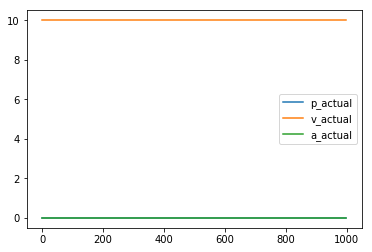

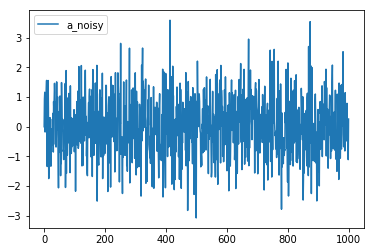

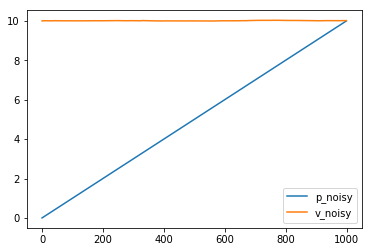

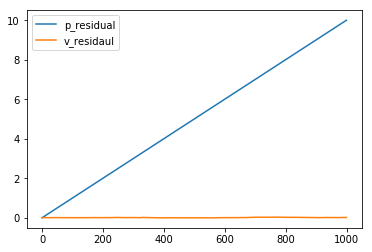

In [754]:
def step_time_noisy(p_t,v_t,a_t):
    a_hat = a_t + my_rand()
    v_hat = a_hat*dt + v_t
    p_hat = a_hat*dt*dt + v_hat*dt + p_t
    return p_hat, v_hat, a_hat

def step_time_actual(p_t,v_t,a_t):
    v_next = a_t*dt + v_t
    p_next = a_t*dt*dt + v_t*dt + p_t
    return p_t, v_t
    
def step_all():
    for i in range(1,time_steps):
        p_noisy[i], v_noisy[i], a_noisy[i] = step_time_noisy(p_noisy[i-1],v_noisy[i-1],a_actual[i-1])
        p_actual[i], v_actual[i] = step_time_actual(p_actual[i-1],v_actual[i-1],a_actual[i-1])
               
step_all()
plot_all()
plot_all([a_noisy],['a_noisy'])
plot_all([p_noisy,v_noisy],['p_noisy','v_noisy'])
plot_all([p_noisy-p_actual,v_noisy-v_actual], ['p_residual', 'v_residaul'])

In [718]:
def plot_traj():
    # p = 1/2at + v_0t + p0
    p_hat_future = np.zeros(1500)
    for i in range(len(p_hat_future)):
        p_hat_future[i] = v[-1]*i*dt + p[-1]
    plt.plot(p_hat_future,label='p_hat_future')
    p_actual_future = np.zeros(1500)
    for i in range(len(p_actual_future)):
        p_actual_future[i] = v[0]*i*dt + v[0]*time_steps*dt
    plt.plot(p_actual_future,label='p_actual_future')
    plt.legend()
    plt.show()